In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
feature=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [4]:
# load data
data  = pd.read_csv('heart+disease/processed.va.data', sep=",",names=feature)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [6]:
data.shape

(200, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    200 non-null object
chol        200 non-null object
fbs         200 non-null object
restecg     200 non-null int64
thalach     200 non-null object
exang       200 non-null object
oldpeak     200 non-null object
slope       200 non-null object
ca          200 non-null object
thal        200 non-null object
target      200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [8]:
data = data.replace({'?':np.NaN})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    144 non-null object
chol        193 non-null object
fbs         193 non-null object
restecg     200 non-null int64
thalach     147 non-null object
exang       147 non-null object
oldpeak     144 non-null object
slope       98 non-null object
ca          2 non-null object
thal        34 non-null object
target      200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [10]:
del data['slope']
del data['ca']
del data['thal']

In [11]:
data = data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 199
Data columns (total 11 columns):
age         130 non-null int64
sex         130 non-null int64
cp          130 non-null int64
trestbps    130 non-null object
chol        130 non-null object
fbs         130 non-null object
restecg     130 non-null int64
thalach     130 non-null object
exang       130 non-null object
oldpeak     130 non-null object
target      130 non-null int64
dtypes: int64(5), object(6)
memory usage: 12.2+ KB


In [13]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['trestbps']= label_encoder.fit_transform(data['trestbps'])
data['chol']= label_encoder.fit_transform(data['chol'])
data['fbs']= label_encoder.fit_transform(data['fbs'])

data['thalach']= label_encoder.fit_transform(data['thalach'])
data['exang']= label_encoder.fit_transform(data['exang'])
data['oldpeak']= label_encoder.fit_transform(data['oldpeak'])

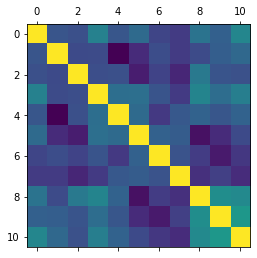

In [14]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

In [15]:
# changing attack labels to their respective attack class
def change_label(df):
  df.target.replace([1,2,3,4],1,inplace=True)

In [16]:
change_label(data)

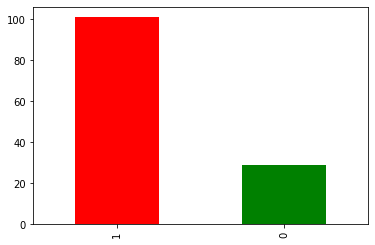

In [17]:
data.target.value_counts().plot(kind='bar',color=['red','green']);

In [18]:
data.to_csv('va_processed.csv')

In [19]:
X = data.drop(["target"],axis =1)
y = data["target"]

In [20]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [21]:
from imblearn.metrics import specificity_score, sensitivity_score

In [22]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=42)

In [23]:
X_train.shape

(117, 10)

In [24]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
spec = []
sens = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    spec.append(round(e,3))
    sens.append(round(f,3))

In [68]:
ML_Model1 = []
accuracy1 = []
precision1 = []
recall1 = []
f1score1 = []
spec1 = []
sens1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d,e,f):
    ML_Model1.append(model)
    accuracy1.append(round(a, 3))
    precision1.append(round(b, 3))
    recall1.append(round(c, 3))
    f1score1.append(round(d, 3))
    spec1.append(round(e,3))
    sens1.append(round(f,3))

# Modelling

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')
knn_spec = specificity_score(y_pred, y_test,average='weighted')
knn_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [69]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1,knn_spec,knn_sens)

# Linear SVC

In [26]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0, tol=1e-5)
lsvc.fit(X_train, y_train)

y_pred    = lsvc.predict(X_test)

lsvc_acc = accuracy_score(y_pred, y_test)
lsvc_prec = precision_score(y_pred, y_test,average='weighted')
lsvc_rec = recall_score(y_pred, y_test,average='weighted')
lsvc_f1 = f1_score(y_pred, y_test,average='weighted')
lsvc_spec = specificity_score(y_pred, y_test,average='weighted')
lsvc_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [70]:
storeResults('LinearSVC',lsvc_acc,lsvc_prec,lsvc_rec,lsvc_f1,lsvc_spec,lsvc_sens)

# Gaussian Process

In [27]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

gp = GaussianProcessClassifier(kernel=kernel,random_state=0)
gp.fit(X_train, y_train)

y_pred    = gp.predict(X_test)

gp_acc = accuracy_score(y_pred, y_test)
gp_prec = precision_score(y_pred, y_test,average='weighted')
gp_rec = recall_score(y_pred, y_test,average='weighted')
gp_f1 = f1_score(y_pred, y_test,average='weighted')
gp_spec = specificity_score(y_pred, y_test,average='weighted')
gp_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [71]:
storeResults('Guassian Process',gp_acc,gp_prec,gp_rec,gp_f1,gp_spec,gp_sens)

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1000)

tree.fit(X_train, y_train)

y_pred    = tree.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')
dt_spec = specificity_score(y_pred, y_test,average='weighted')
dt_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [72]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1,dt_spec,dt_sens)

# Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred    = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')
nb_spec = specificity_score(y_pred, y_test,average='weighted')
nb_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [73]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1,nb_spec,nb_sens)

# QDA

In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_pred    = qda.predict(X_test)

qda_acc = accuracy_score(y_pred, y_test)
qda_prec = precision_score(y_pred, y_test,average='weighted')
qda_rec = recall_score(y_pred, y_test,average='weighted')
qda_f1 = f1_score(y_pred, y_test,average='weighted')
qda_spec = specificity_score(y_pred, y_test,average='weighted')
qda_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [74]:
storeResults('QDA',qda_acc,qda_prec,qda_rec,qda_f1,qda_spec,qda_sens)

# AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

ab.fit(X_train, y_train)

y_pred    = ab.predict(X_test)

ab_acc = accuracy_score(y_pred, y_test)
ab_prec = precision_score(y_pred, y_test,average='weighted')
ab_rec = recall_score(y_pred, y_test,average='weighted')
ab_f1 = f1_score(y_pred, y_test,average='weighted')
ab_spec = specificity_score(y_pred, y_test,average='weighted')
ab_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [75]:
storeResults('AdaBoost',ab_acc,ab_prec,ab_rec,ab_f1,ab_spec,ab_sens)

# Bagging Classifier

In [33]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=10, random_state=0)
clf.fit(X_train, y_train)

y_pred    = clf.predict(X_test)
bg_acc = accuracy_score(y_pred, y_test)
bg_prec = precision_score(y_pred, y_test,average='weighted')
bg_rec = recall_score(y_pred, y_test,average='weighted')
bg_f1 = f1_score(y_pred, y_test,average='weighted')
bg_spec = specificity_score(y_pred, y_test,average='weighted')
bg_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [76]:
storeResults('Bagging',bg_acc,bg_prec,bg_rec,bg_f1,bg_spec,bg_sens)

# Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
clf =  GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)

y_pred    = clf.predict(X_test)
bos_acc = accuracy_score(y_pred, y_test)
bos_prec = precision_score(y_pred, y_test,average='weighted')
bos_rec = recall_score(y_pred, y_test,average='weighted')
bos_f1 = f1_score(y_pred, y_test,average='weighted')
bos_spec = specificity_score(y_pred, y_test,average='weighted')
bos_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [77]:
storeResults('Boosting',bos_acc,bos_prec,bos_rec,bos_f1,bos_spec,bos_sens)

# Stacking Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000)),('mlp', MLPClassifier(random_state=1, max_iter=3000))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf.fit(X_train,y_train)

y_pred    = clf.predict(X_test)
stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')
stac_spec = specificity_score(y_pred, y_test,average='weighted')
stac_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [104]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1,stac_spec,stac_sens)

# Voting Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = DecisionTreeClassifier(random_state=50)
clf2 = RandomForestClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train,y_train)
y_pred    = clf.predict(X_test)
vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_spec = specificity_score(y_pred, y_test,average='weighted')
vot_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [105]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1,vot_spec,vot_sens)

# DNN

In [37]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks

In [38]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# 3 Layers

In [39]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
47/47 [==============================] - 26s 23ms/step - loss: 0.6664 - accuracy: 0.7777 - val_loss: 0.5173 - val_accuracy: 0.7917
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.7527 - val_loss: 0.5425 - val_accuracy: 0.7917
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.8144 - val_loss: 0.5335 - val_accuracy: 0.7917
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7729 - val_loss: 0.5519 - val_accuracy: 0.7917
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.7385 - val_loss: 0.5472 - val_accuracy: 0.7917
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7998 - val_loss: 0.5666 - val_accuracy: 0.7917
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7949 - val_loss: 0.5980 - val_accuracy: 0.7917
Epoch 8/100

Epoch 59/100
47/47 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.8664 - val_loss: 1.0385 - val_accuracy: 0.6250
Epoch 60/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8824 - val_loss: 0.9885 - val_accuracy: 0.7500
Epoch 61/100
47/47 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.9217 - val_loss: 0.9886 - val_accuracy: 0.7083
Epoch 62/100
47/47 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8642 - val_loss: 1.1117 - val_accuracy: 0.5417
Epoch 63/100
47/47 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.9306 - val_loss: 1.1789 - val_accuracy: 0.4583
Epoch 64/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8910 - val_loss: 0.9653 - val_accuracy: 0.7083
Epoch 65/100
47/47 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9103 - val_loss: 1.0201 - val_accuracy: 0.7083
Epoch 

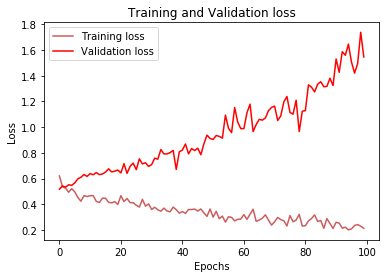

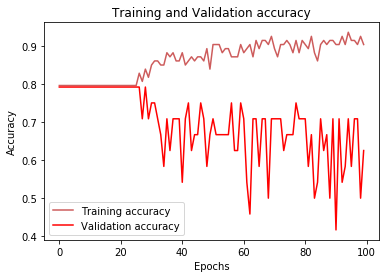

In [41]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

In [43]:
dnn_3_acc = accuracy_score(y_pred, y_test)
dnn_3_prec = precision_score(y_pred, y_test,average='weighted')
dnn_3_rec = recall_score(y_pred, y_test,average='weighted')
dnn_3_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_3_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_3_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [78]:
storeResults1('DNN - 3 Layers',dnn_3_acc,dnn_3_prec,dnn_3_rec,dnn_3_f1,dnn_3_spec,dnn_3_sens)

# 4 Layers

In [44]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
47/47 [==============================] - 3s 16ms/step - loss: 0.6766 - accuracy: 0.6679 - val_loss: 0.5178 - val_accuracy: 0.7917
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.8266 - val_loss: 0.5237 - val_accuracy: 0.7917
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8186 - val_loss: 0.5579 - val_accuracy: 0.7917
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8558 - val_loss: 0.5958 - val_accuracy: 0.7917
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.8363 - val_loss: 0.6470 - val_accuracy: 0.7917
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8214 - val_loss: 0.6698 - val_accuracy: 0.7917
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 0.7668 - val_loss: 0.7670 - val_accuracy: 0.7917
Epoch 8/100


Epoch 59/100
47/47 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.9005 - val_loss: 1.1673 - val_accuracy: 0.5833
Epoch 60/100
47/47 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.9302 - val_loss: 1.0339 - val_accuracy: 0.6250
Epoch 61/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8270 - val_loss: 0.9768 - val_accuracy: 0.6250
Epoch 62/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.7979 - val_loss: 1.1570 - val_accuracy: 0.6667
Epoch 63/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.8729 - val_loss: 1.1510 - val_accuracy: 0.5833
Epoch 64/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 0.8584 - val_loss: 1.1064 - val_accuracy: 0.6667
Epoch 65/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.9041 - val_loss: 1.4564 - val_accuracy: 0.6250
Epoch 

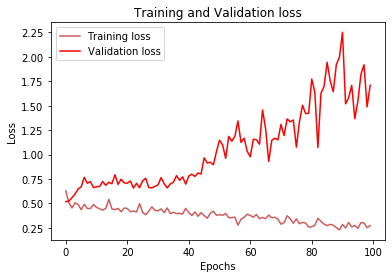

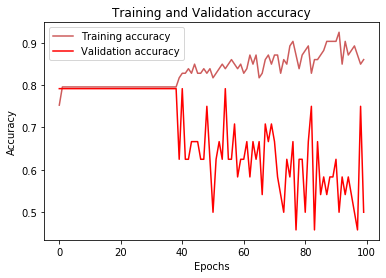

In [46]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_4_acc = accuracy_score(y_pred, y_test)
dnn_4_prec = precision_score(y_pred, y_test,average='weighted')
dnn_4_rec = recall_score(y_pred, y_test,average='weighted')
dnn_4_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_4_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_4_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [79]:
storeResults1('DNN - 4 Layers',dnn_4_acc,dnn_4_prec,dnn_4_rec,dnn_4_f1,dnn_4_spec,dnn_4_sens)

# 5 Layers

In [48]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
47/47 [==============================] - 6s 33ms/step - loss: 0.6873 - accuracy: 0.7174 - val_loss: 0.5762 - val_accuracy: 0.7917
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.5562 - accuracy: 0.7791 - val_loss: 0.5332 - val_accuracy: 0.7917
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4659 - accuracy: 0.8014 - val_loss: 0.5541 - val_accuracy: 0.7917
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.8028 - val_loss: 0.5791 - val_accuracy: 0.7917
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.5493 - accuracy: 0.7844 - val_loss: 0.6001 - val_accuracy: 0.7917
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4283 - accuracy: 0.8166 - val_loss: 0.6386 - val_accuracy: 0.7917
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.8027 - val_loss: 0.6366 - val_accuracy: 0.7917
Epoch 8/100


47/47 [==============================] - 0s 4ms/step - loss: 0.4069 - accuracy: 0.8327 - val_loss: 1.4466 - val_accuracy: 0.7917
Epoch 59/100
47/47 [==============================] - 0s 5ms/step - loss: 0.3098 - accuracy: 0.8266 - val_loss: 1.1574 - val_accuracy: 0.7917
Epoch 60/100
47/47 [==============================] - 0s 5ms/step - loss: 0.3200 - accuracy: 0.8550 - val_loss: 1.1915 - val_accuracy: 0.7917
Epoch 61/100
47/47 [==============================] - 0s 5ms/step - loss: 0.3288 - accuracy: 0.8030 - val_loss: 1.3797 - val_accuracy: 0.7917
Epoch 62/100
47/47 [==============================] - 0s 5ms/step - loss: 0.3414 - accuracy: 0.8340 - val_loss: 1.1310 - val_accuracy: 0.7917
Epoch 63/100
47/47 [==============================] - 0s 5ms/step - loss: 0.3128 - accuracy: 0.8295 - val_loss: 1.1015 - val_accuracy: 0.7917
Epoch 64/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2969 - accuracy: 0.8455 - val_loss: 1.0794 - val_accuracy: 0.7917
Epoch 65/100
47/47 

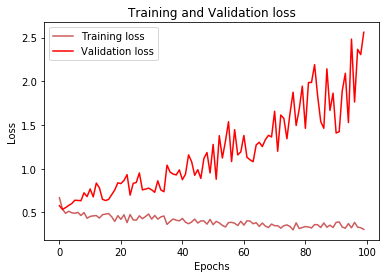

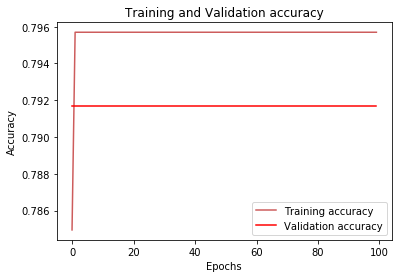

In [50]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_5_acc = accuracy_score(y_pred, y_test)
dnn_5_prec = precision_score(y_pred, y_test,average='weighted')
dnn_5_rec = recall_score(y_pred, y_test,average='weighted')
dnn_5_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_5_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_5_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [80]:
storeResults1('DNN - 5 Layers',dnn_5_acc,dnn_5_prec,dnn_5_rec,dnn_5_f1,dnn_5_spec,dnn_5_sens)

# 6 Layers

In [52]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
47/47 [==============================] - 10s 41ms/step - loss: 0.6897 - accuracy: 0.7994 - val_loss: 0.6740 - val_accuracy: 0.7917
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6358 - accuracy: 0.7987 - val_loss: 0.5194 - val_accuracy: 0.7917
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.5470 - accuracy: 0.7933 - val_loss: 0.5278 - val_accuracy: 0.7917
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7907 - val_loss: 0.5337 - val_accuracy: 0.7917
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.7978 - val_loss: 0.5405 - val_accuracy: 0.7917
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3794 - accuracy: 0.8845 - val_loss: 0.5437 - val_accuracy: 0.7917
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.7566 - val_loss: 0.5697 - val_accuracy: 0.7917
Epoch 8/100

Epoch 59/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3748 - accuracy: 0.8286 - val_loss: 1.4191 - val_accuracy: 0.7917
Epoch 60/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3454 - accuracy: 0.8404 - val_loss: 1.2426 - val_accuracy: 0.7917
Epoch 61/100
47/47 [==============================] - 0s 5ms/step - loss: 0.4141 - accuracy: 0.8437 - val_loss: 1.2178 - val_accuracy: 0.7917
Epoch 62/100
47/47 [==============================] - 0s 5ms/step - loss: 0.3804 - accuracy: 0.8379 - val_loss: 1.4508 - val_accuracy: 0.7917
Epoch 63/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3745 - accuracy: 0.8142 - val_loss: 1.6568 - val_accuracy: 0.7917
Epoch 64/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3204 - accuracy: 0.8202 - val_loss: 1.3217 - val_accuracy: 0.7917
Epoch 65/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8295 - val_loss: 1.0926 - val_accuracy: 0.7917
Epoch 

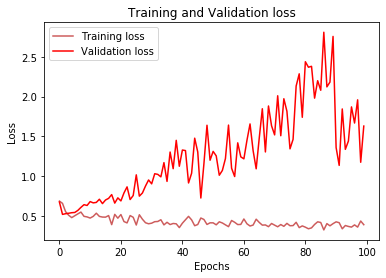

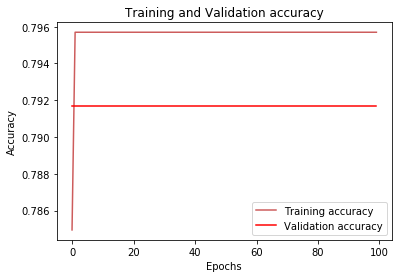

In [54]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_6_acc = accuracy_score(y_pred, y_test)
dnn_6_prec = precision_score(y_pred, y_test,average='weighted')
dnn_6_rec = recall_score(y_pred, y_test,average='weighted')
dnn_6_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_6_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_6_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [81]:
storeResults1('DNN - 6 Layers',dnn_6_acc,dnn_6_prec,dnn_6_rec,dnn_6_f1,dnn_6_spec,dnn_6_sens)

# 7 Layers

In [56]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [57]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
47/47 [==============================] - 13s 59ms/step - loss: 0.6907 - accuracy: 0.7317 - val_loss: 0.6820 - val_accuracy: 0.7917
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 0.6733 - accuracy: 0.8252 - val_loss: 0.5525 - val_accuracy: 0.7917
Epoch 3/100
47/47 [==============================] - 0s 5ms/step - loss: 0.6482 - accuracy: 0.7828 - val_loss: 0.5352 - val_accuracy: 0.7917
Epoch 4/100
47/47 [==============================] - 0s 5ms/step - loss: 0.4824 - accuracy: 0.8201 - val_loss: 0.5472 - val_accuracy: 0.7917
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.7385 - val_loss: 0.5594 - val_accuracy: 0.7917
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8456 - val_loss: 0.5623 - val_accuracy: 0.7917
Epoch 7/100
47/47 [==============================] - 0s 6ms/step - loss: 0.5992 - accuracy: 0.8153 - val_loss: 0.5727 - val_accuracy: 0.7917
Epoch 8/100

Epoch 59/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3350 - accuracy: 0.8102 - val_loss: 1.7488 - val_accuracy: 0.7917
Epoch 60/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3239 - accuracy: 0.8172 - val_loss: 1.3003 - val_accuracy: 0.7917
Epoch 61/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.7525 - val_loss: 1.8775 - val_accuracy: 0.7917
Epoch 62/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2704 - accuracy: 0.8346 - val_loss: 1.4880 - val_accuracy: 0.7917
Epoch 63/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3939 - accuracy: 0.8095 - val_loss: 1.1996 - val_accuracy: 0.7917
Epoch 64/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3693 - accuracy: 0.8242 - val_loss: 1.4866 - val_accuracy: 0.7917
Epoch 65/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3697 - accuracy: 0.8390 - val_loss: 0.9729 - val_accuracy: 0.7917
Epoch 

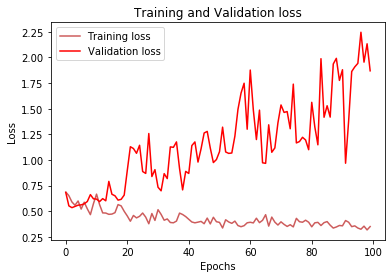

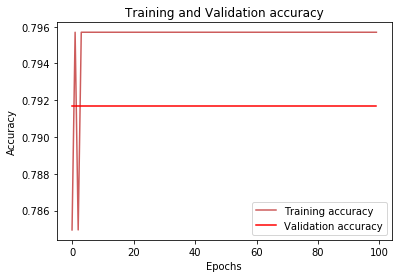

In [58]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_7_acc = accuracy_score(y_pred, y_test)
dnn_7_prec = precision_score(y_pred, y_test,average='weighted')
dnn_7_rec = recall_score(y_pred, y_test,average='weighted')
dnn_7_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_7_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_7_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [82]:
storeResults1('DNN - 7 Layers',dnn_7_acc,dnn_7_prec,dnn_7_rec,dnn_7_f1,dnn_7_spec,dnn_7_sens)

# 8 Layers

In [60]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
47/47 [==============================] - 10s 45ms/step - loss: 0.6905 - accuracy: 0.6948 - val_loss: 0.6820 - val_accuracy: 0.7917
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6738 - accuracy: 0.8950 - val_loss: 0.6642 - val_accuracy: 0.7917
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.7658 - val_loss: 0.5490 - val_accuracy: 0.7917
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.7975 - val_loss: 0.5285 - val_accuracy: 0.7917
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.6634 - val_loss: 0.5484 - val_accuracy: 0.7917
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.5665 - accuracy: 0.7802 - val_loss: 0.5500 - val_accuracy: 0.7917
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 0.5729 - accuracy: 0.8169 - val_loss: 0.5704 - val_accuracy: 0.7917
Epoch 8/100

Epoch 59/100
47/47 [==============================] - 0s 5ms/step - loss: 0.4495 - accuracy: 0.7363 - val_loss: 1.3718 - val_accuracy: 0.7917
Epoch 60/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4380 - accuracy: 0.7668 - val_loss: 1.8392 - val_accuracy: 0.7917
Epoch 61/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3779 - accuracy: 0.8140 - val_loss: 1.3819 - val_accuracy: 0.7917
Epoch 62/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3321 - accuracy: 0.8533 - val_loss: 1.9542 - val_accuracy: 0.7917
Epoch 63/100
47/47 [==============================] - 0s 5ms/step - loss: 0.3660 - accuracy: 0.8247 - val_loss: 2.0911 - val_accuracy: 0.7917
Epoch 64/100
47/47 [==============================] - 0s 5ms/step - loss: 0.3561 - accuracy: 0.8197 - val_loss: 1.5574 - val_accuracy: 0.7917
Epoch 65/100
47/47 [==============================] - 0s 6ms/step - loss: 0.3950 - accuracy: 0.8397 - val_loss: 2.1384 - val_accuracy: 0.7917
Epoch 

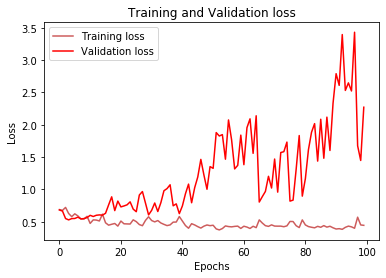

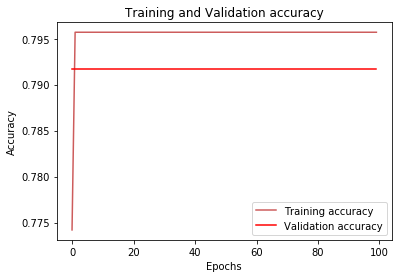

In [62]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_8_acc = accuracy_score(y_pred, y_test)
dnn_8_prec = precision_score(y_pred, y_test,average='weighted')
dnn_8_rec = recall_score(y_pred, y_test,average='weighted')
dnn_8_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_8_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_8_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [83]:
storeResults1('DNN - 8 Layers',dnn_8_acc,dnn_8_prec,dnn_8_rec,dnn_8_f1,dnn_8_spec,dnn_8_sens)

# 9 Layers

In [64]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [65]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
47/47 [==============================] - 13s 63ms/step - loss: 0.6905 - accuracy: 0.7164 - val_loss: 0.6825 - val_accuracy: 0.7917
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 0.6827 - accuracy: 0.7338 - val_loss: 0.6714 - val_accuracy: 0.7917
Epoch 3/100
47/47 [==============================] - 0s 5ms/step - loss: 0.6756 - accuracy: 0.6907 - val_loss: 0.6417 - val_accuracy: 0.7917
Epoch 4/100
47/47 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.7785 - val_loss: 0.5701 - val_accuracy: 0.7917
Epoch 5/100
47/47 [==============================] - 0s 5ms/step - loss: 0.6068 - accuracy: 0.7890 - val_loss: 0.5417 - val_accuracy: 0.7917
Epoch 6/100
47/47 [==============================] - 0s 5ms/step - loss: 0.5286 - accuracy: 0.8398 - val_loss: 0.5345 - val_accuracy: 0.7917
Epoch 7/100
47/47 [==============================] - 0s 5ms/step - loss: 0.4856 - accuracy: 0.7940 - val_loss: 0.5723 - val_accuracy: 0.7917
Epoch 8/100

47/47 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8267 - val_loss: 1.0510 - val_accuracy: 0.7917
Epoch 59/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7178 - val_loss: 0.7524 - val_accuracy: 0.7917
Epoch 60/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4425 - accuracy: 0.7631 - val_loss: 0.6929 - val_accuracy: 0.7917
Epoch 61/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4832 - accuracy: 0.7330 - val_loss: 1.0490 - val_accuracy: 0.7917
Epoch 62/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3812 - accuracy: 0.8079 - val_loss: 0.7794 - val_accuracy: 0.7917
Epoch 63/100
47/47 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy: 0.7542 - val_loss: 0.9002 - val_accuracy: 0.7917
Epoch 64/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4037 - accuracy: 0.8183 - val_loss: 1.0838 - val_accuracy: 0.7917
Epoch 65/100
47/47 

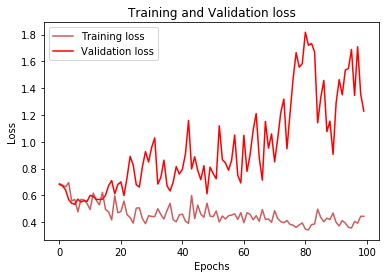

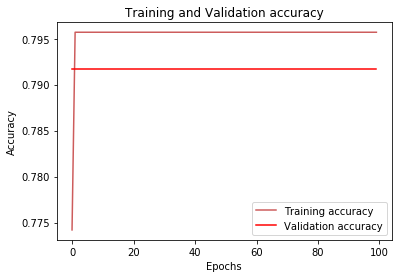

In [66]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_9_acc = accuracy_score(y_pred, y_test)
dnn_9_prec = precision_score(y_pred, y_test,average='weighted')
dnn_9_rec = recall_score(y_pred, y_test,average='weighted')
dnn_9_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_9_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_9_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [84]:
storeResults1('DNN - 9 Layers',dnn_9_acc,dnn_9_prec,dnn_9_rec,dnn_9_f1,dnn_9_spec,dnn_9_sens)

# Comparison

In [106]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                       'Specificity' : spec,
                       'Sensitivity' : sens
                      }) 

In [107]:
result

,ML Model,Accuracy,Precision,Recall,F1_score,Specificity,Sensitivity
0,KNN,0.692,0.938,0.692,0.764,0.974,0.692
1,LinearSVC,0.615,1.000,0.615,0.762,0.000,0.615
2,Guassian Process,0.615,0.771,0.615,0.667,0.521,0.615
3,Decision Tree,0.615,0.642,0.615,0.625,0.551,0.615
4,Naive Bayes,0.615,0.771,0.615,0.667,0.521,0.615
5,QDA,0.615,1.000,0.615,0.762,0.000,0.615
6,AdaBoost,0.692,0.765,0.692,0.714,0.674,0.692
7,Bagging,0.538,0.808,0.538,0.646,0.045,0.538
8,Boosting,0.692,0.765,0.692,0.714,0.674,0.692
9,Stacking Classifier,0.792,0.854,0.792,0.816,0.595,0.792


In [108]:
#creating dataframe
result1 = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                       'Precision': precision1,
                       'Recall'   : recall1, 
                       'F1_score' : f1score1,
                       'Specificity' : spec1,
                       'Sensitivity' : sens1
                      }) 

In [109]:
result1

,ML Model,Accuracy,Precision,Recall,F1_score,Specificity,Sensitivity
0,DNN - 3 Layers,0.769,0.908,0.769,0.800,0.958,0.769
1,DNN - 4 Layers,0.769,0.908,0.769,0.800,0.958,0.769
2,DNN - 5 Layers,0.615,1.000,0.615,0.762,0.000,0.615
3,DNN - 6 Layers,0.615,1.000,0.615,0.762,0.000,0.615
4,DNN - 7 Layers,0.615,1.000,0.615,0.762,0.000,0.615
5,DNN - 8 Layers,0.615,1.000,0.615,0.762,0.000,0.615
6,DNN - 9 Layers,0.615,1.000,0.615,0.762,0.000,0.615


# Graph

# ML

In [110]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

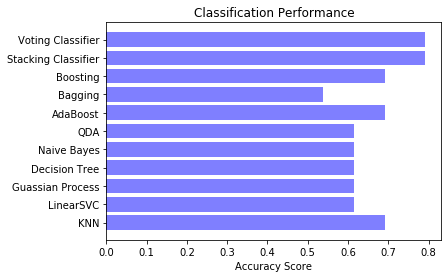

In [111]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

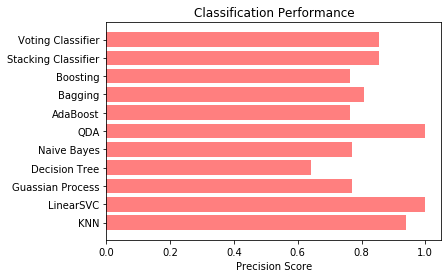

In [112]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

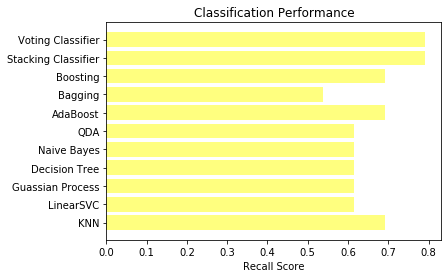

In [113]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

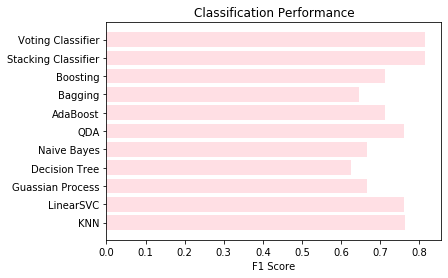

In [114]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

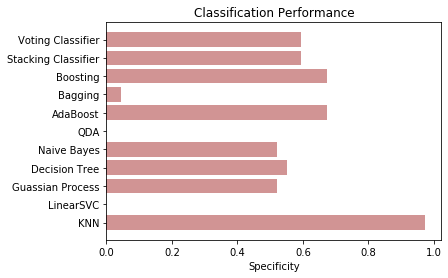

In [115]:
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

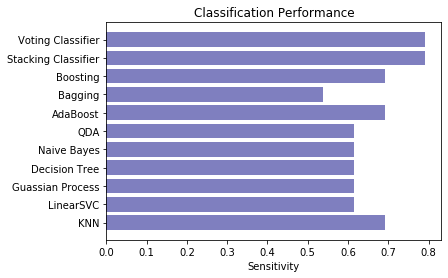

In [116]:
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()

# DL

In [97]:
classifier = ML_Model1
y_pos = np.arange(len(classifier))

# Accuracy

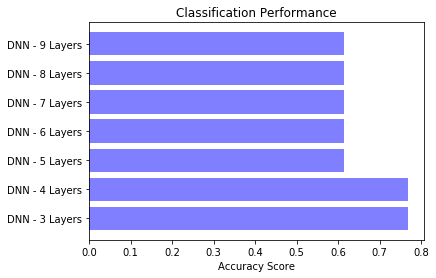

In [98]:
plt2.barh(y_pos, accuracy1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

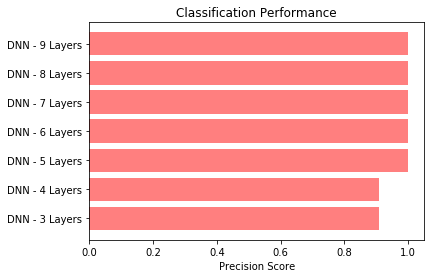

In [99]:
plt2.barh(y_pos, precision1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

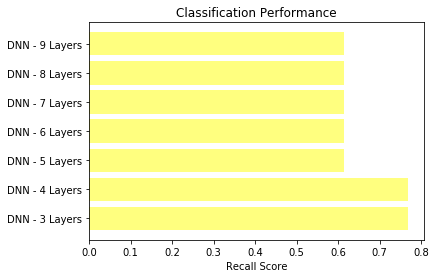

In [100]:
plt2.barh(y_pos, recall1, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

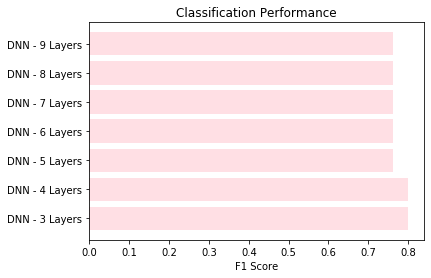

In [101]:
plt2.barh(y_pos, f1score1, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

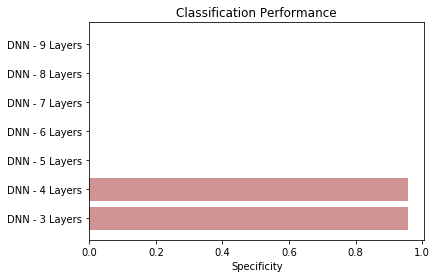

In [102]:
plt2.barh(y_pos, spec1, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

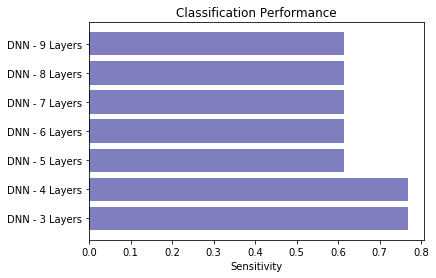

In [103]:
plt2.barh(y_pos, sens1, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()